# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# VGG13 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
from cifar10.tnt_solver import *
from cifar10.classifiers.vgg import VGG13

model = VGG13()
print(model)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# train

In [3]:
%%time
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = F.cross_entropy
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)

# lr_scheduler = None
history = main(model, opt, epoch=150, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/150, lr:1.00e-01
100%|██████████| 625/625 [00:42<00:00, 14.68it/s, loss:2.0754, acc:19.7225%]
Val loss: 1.8478, accuracy: 26.08%
Epoch: 2/150, lr:1.00e-01
100%|██████████| 625/625 [00:42<00:00, 14.66it/s, loss:1.6014, acc:38.3550%]
Val loss: 1.2857, accuracy: 53.68%
Epoch: 3/150, lr:1.00e-01
100%|██████████| 625/625 [00:42<00:00, 14.60it/s, loss:1.2014, acc:56.8200%]
Val loss: 1.1871, accuracy: 58.68%
Epoch: 4/150, lr:1.00e-01
100%|██████████| 625/625 [01:06<00:00,  9.44it/s, loss:1.0056, acc:64.4350%]
Val loss: 1.2032, accuracy: 60.23%
Epoch: 5/150, lr:1.00e-01
100%|██████████| 625/625 [01:06<00:00,  9.40it/s, loss:0.8826, acc:69.3825%]
Val loss: 1.5145, accuracy: 55.32%
Epoch: 6/150, lr:1.00e-01
100%|██████████| 625/625 [01:06<00:00,  9.39it/s, loss:0.8006, acc:72.7175%]
Val loss: 1.0807, accuracy: 64.48%
Epoch: 7/150, lr:1.00e-01
100%|██████████| 625/625 [01:06<

100%|██████████| 625/625 [01:06<00:00,  9.40it/s, loss:0.0260, acc:99.1150%]
Val loss: 0.3018, accuracy: 91.97%
Epoch: 60/150, lr:3.13e-03
100%|██████████| 625/625 [01:06<00:00,  9.39it/s, loss:0.0201, acc:99.4250%]
Val loss: 0.2987, accuracy: 92.18%
Epoch: 61/150, lr:3.13e-03
100%|██████████| 625/625 [01:06<00:00,  9.37it/s, loss:0.0183, acc:99.4175%]
Val loss: 0.2893, accuracy: 92.35%
Epoch: 62/150, lr:3.13e-03
100%|██████████| 625/625 [01:06<00:00,  9.34it/s, loss:0.0201, acc:99.3325%]
Val loss: 0.3024, accuracy: 92.01%
Epoch: 63/150, lr:3.13e-03
100%|██████████| 625/625 [01:06<00:00,  9.43it/s, loss:0.0171, acc:99.4800%]
Val loss: 0.3020, accuracy: 92.06%
Epoch: 64/150, lr:3.13e-03
100%|██████████| 625/625 [01:05<00:00,  9.49it/s, loss:0.0184, acc:99.4250%]
Val loss: 0.3110, accuracy: 92.03%
Epoch: 65/150, lr:3.13e-03
100%|██████████| 625/625 [01:06<00:00,  9.47it/s, loss:0.0189, acc:99.3800%]
Val loss: 0.3114, accuracy: 92.06%
Epoch: 66/150, lr:3.13e-03
100%|██████████| 625/625 [0

100%|██████████| 625/625 [01:06<00:00,  9.41it/s, loss:0.0023, acc:99.9650%]
Val loss: 0.2894, accuracy: 93.08%
Epoch: 119/150, lr:9.77e-05
100%|██████████| 625/625 [01:06<00:00,  9.45it/s, loss:0.0022, acc:99.9800%]
Val loss: 0.2889, accuracy: 93.00%
Epoch: 120/150, lr:9.77e-05
100%|██████████| 625/625 [01:06<00:00,  9.37it/s, loss:0.0023, acc:99.9725%]
Val loss: 0.2895, accuracy: 93.04%
Epoch: 121/150, lr:9.77e-05
100%|██████████| 625/625 [01:07<00:00,  9.22it/s, loss:0.0024, acc:99.9750%]
Val loss: 0.2888, accuracy: 92.95%
Epoch: 122/150, lr:9.77e-05
100%|██████████| 625/625 [01:06<00:00,  9.36it/s, loss:0.0021, acc:99.9775%]
Val loss: 0.2907, accuracy: 93.02%
Epoch: 123/150, lr:4.88e-05
100%|██████████| 625/625 [01:06<00:00,  9.37it/s, loss:0.0020, acc:99.9800%]
Val loss: 0.2869, accuracy: 93.06%
Epoch: 124/150, lr:4.88e-05
100%|██████████| 625/625 [01:06<00:00,  9.38it/s, loss:0.0022, acc:99.9675%] 
Val loss: 0.2898, accuracy: 93.00%
Epoch: 125/150, lr:4.88e-05
100%|██████████| 62

# plot loss history
We check the classifier by plotting the loss and acc.

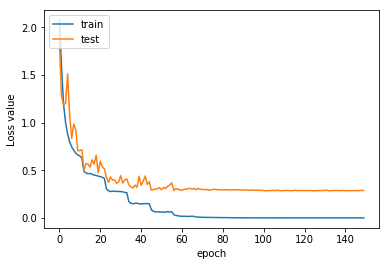

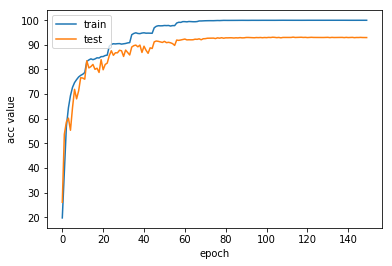

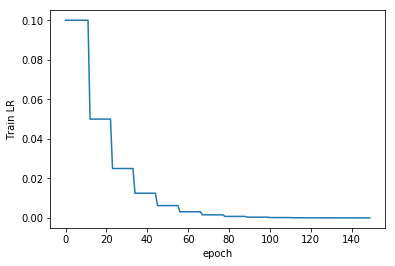

In [4]:
plot_history(history)